In [184]:
#Articulate all pandas and modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import sys
from numpy import mean, median
from scipy.stats import mode
import statsmodels.api as sm
from sklearn import linear_model
%matplotlib inline


In [185]:
#Import data using the Pandas library
ames = pd.read_csv('/Users/DES/DSI-NYC-5/projects/project-3-house-prices/assets/train.csv')


In [186]:
ames.columns


Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [187]:
len(ames.columns)


81

In [188]:
#Subset Ames Training Data to the designated Features
ames = pd.DataFrame(ames, columns=['Neighborhood','LotArea','Utilities','BldgType','HouseStyle','OverallQual',
                          'OverallCond','YearBuilt','YearRemodAdd', 'RoofStyle','RoofMatl',
                          'GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','MoSold',
                          'YrSold','SalePrice'])


In [189]:
len(ames.columns)

19

In [190]:
ames.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
Neighborhood    1460 non-null object
LotArea         1460 non-null int64
Utilities       1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
RoofStyle       1460 non-null object
RoofMatl        1460 non-null object
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
MoSold          1460 non-null int64
YrSold          1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(13), object(6)
memory usage: 216.8+ KB



#•	SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
#•	LotArea: Lot size in square feet
#•	Utilities: Type of utilities available
#•	Neighborhood: Physical locations within Ames city limits
#•	BldgType: Type of dwelling
#•	HouseStyle: Style of dwelling
#•	OverallQual: Overall material and finish quality
#•	OverallCond: Overall condition rating
#•	YearBuilt: Original construction date
#•	YearRemodAdd: Remodel date
#•	RoofStyle: Type of roof
#•	RoofMatl: Roof material
#•	GrLivArea: Above grade (ground) living area square feet
#•	FullBath: Full bathrooms above grade
#•	HalfBath: Half baths above grade
#•	Bedroom: Number of bedrooms above basement level
#•	Kitchen: Number of kitchens
#•	MoSold: Month Sold
#•	YrSold: Year Sold


In [191]:
ames.describe()


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1515.463699,1.565068,0.382877,2.866438,1.046575,6.321918,2007.815753,180921.195890
std,9981.264932,1.382997,1.112799,30.202904,20.645407,525.480383,0.550916,0.502885,0.815778,0.220338,2.703626,1.328095,79442.502883
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,7553.500000,5.000000,5.000000,1954.000000,1967.000000,1129.500000,1.000000,0.000000,2.000000,1.000000,5.000000,2007.000000,129975.000000
50%,9478.500000,6.000000,5.000000,1973.000000,1994.000000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2008.000000,163000.000000
75%,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1776.750000,2.000000,1.000000,3.000000,1.000000,8.000000,2009.000000,214000.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,12.000000,2010.000000,755000.000000


In [192]:
# Compute the correlation matrix
corr = ames.corr()


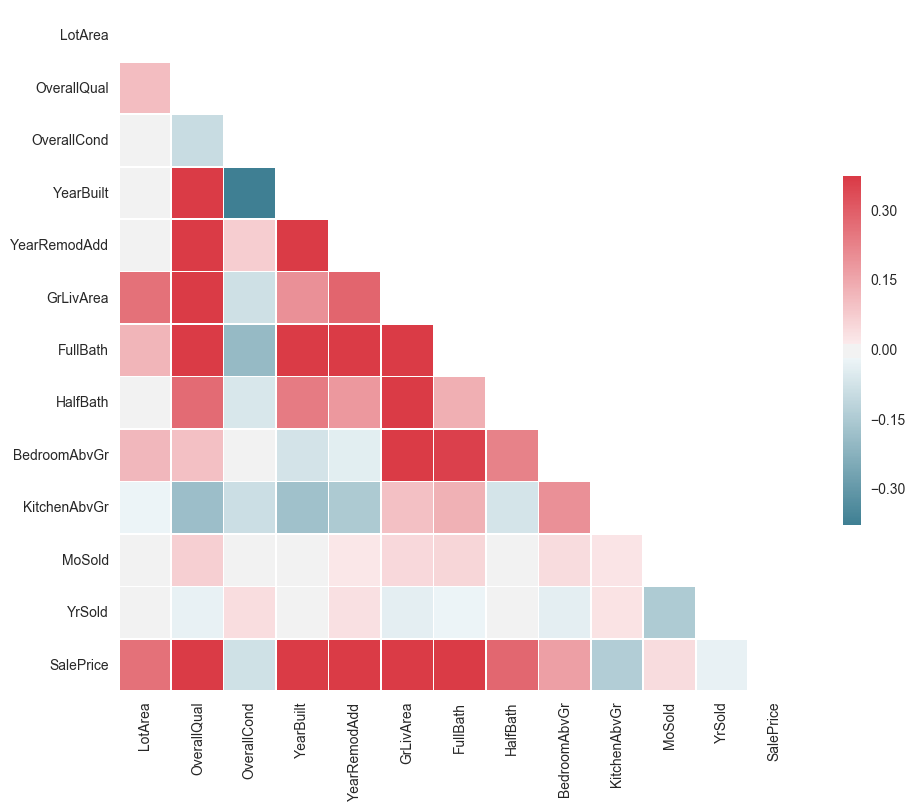

In [193]:
sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 #columns=list(letters[:26]))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, #xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.show()


In [264]:
#Most Expensive Neighborhood
#Sorted by SalePrice
pd.pivot_table(ames, index=['Neighborhood'], values=['SalePrice']).sort_values('SalePrice', ascending=False)


,SalePrice
Neighborhood,
NoRidge,335295
NridgHt,316270
StoneBr,310499
Timber,242247
Veenker,238772
Somerst,225379
ClearCr,212565
Crawfor,210624
CollgCr,197965


In [195]:
#Data Exploratory: Neighborhood and Year Home Sold by Sales Price
#Sorted by mean
pd.pivot_table(ames, index=['Neighborhood'], columns=['YrSold'], \
               values=['SalePrice'],\
               aggfunc=[np.mean],\
               margins=True).sort_values(('mean', 'SalePrice','All'),ascending=False)


mean                                                      
             SalePrice                                                      
YrSold            2006      2007      2008      2009      2010           All
Neighborhood                                                                
NoRidge       322333.0  399730.0  304750.0  323875.0  289938.0  335295.00000
NridgHt       305491.0  310833.0  332422.0  323143.0  308281.0  316270.00000
StoneBr       365046.0  279585.0  245000.0  319967.0  318886.0  310499.00000
Timber        264485.0  229470.0  234361.0  245437.0  245160.0  242247.00000
Veenker       273333.0  214900.0  244000.0       NaN       NaN  238772.00000
Somerst       210268.0  233248.0  225631.0  236315.0  206762.0  225379.00000
ClearCr       199166.0  236333.0  208991.0  169875.0  246850.0  212565.00000
Crawfor       196635.0  198777.0  254411.0  180211.0  296833.0  210624.00000
CollgCr       199016.0  213999.0  187718.0  192317.0  203700.0  197965.00000
Blmngtn       217087.0  183350.0  175447.0  176720.0  192000.0  194870.00000
Gilbert       200250.0  181967.0  186000.0  199955.0  185500.0  192854.00000
NWAmes        199463.0  175267.0  193820.0  185133.0  187428.0  189050.00000
SawyerW       164787.0  209300.0  184080.0  183934.0  184076.0  186555.00000
All           182549.0  186063.0  177360.0  179432.0  177393.0  180921.19589
Mitchel       150036.0  136731.0  165280.0  167860.0  166950.0  156270.00000
NAmes         138985.0  142962.0  151553.0  143880.0  153665.0  145847.00000
NPkVill            NaN  141500.0  140000.0  146937.0  136750.0  142694.00000
SWISU         130125.0  187500.0  139612.0  141048.0  141333.0  142591.00000
Blueste            NaN       NaN  151000.0  124000.0       NaN  137500.00000
Sawyer        149735.0  133935.0  128900.0  136925.0  132400.0  136793.00000
OldTown       135963.0  114794.0  147670.0  116378.0  122464.0  128225.00000
Edwards       134403.0  132588.0  132473.0  123855.0  111445.0  128219.00000
BrkSide       112746.0  135737.0  121707.0  134994.0   96500.0  124834.00000
BrDale         96750.0  113833.0   95225.0  118625.0   88000.0  104493.00000
IDOTRR         95758.0  118933.0   91642.0   89580.0   86278.0  100123.00000
MeadowV       123466.0  105850.0   98000.0   88400.0   81333.0   98576.00000

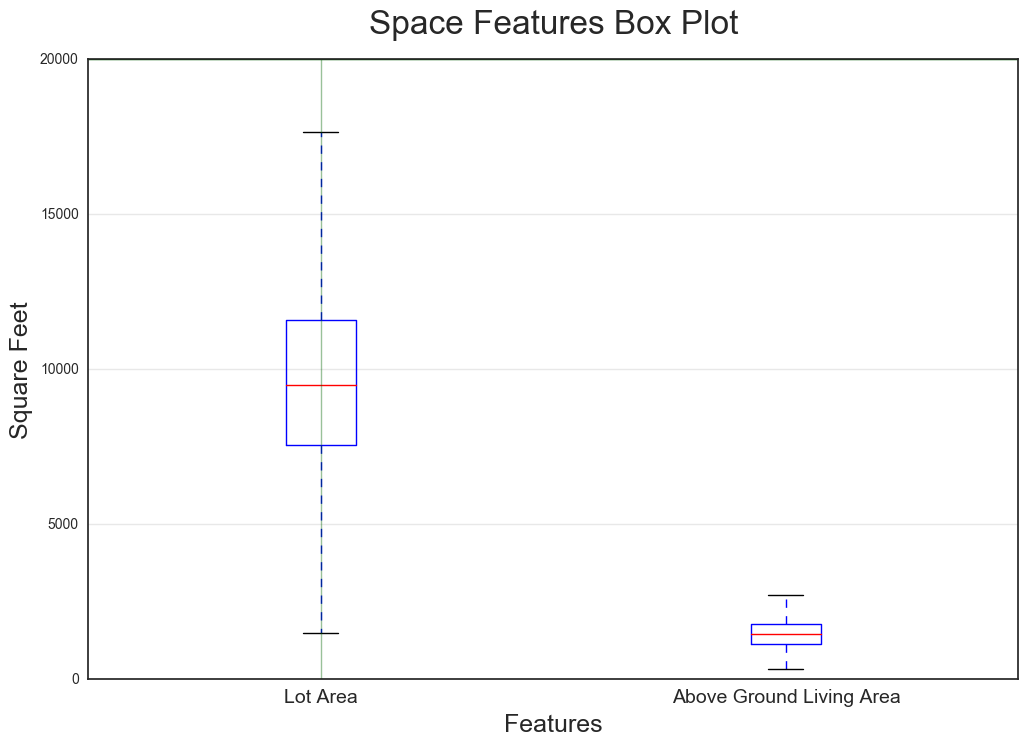

In [196]:
data = [ames['LotArea'], ames['GrLivArea']]

fig, ax1 = plt.subplots(figsize=(12, 8))

plt.boxplot(data)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('Space Features Box Plot', y =1.03, fontsize = 24)
ax1.set_xlabel('Features', fontsize = 18)
ax1.set_ylabel('Square Feet', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 2
ax1.set_xlim(0.5, numBoxes + 0.5) 
ax1.set_ylim(0, 20000)
xtickNames = plt.setp(ax1, xticklabels=['Lot Area', 'Above Ground Living Area'])
plt.setp(xtickNames, fontsize=14)

plt.axhline(20000, color = 'darkgreen')
plt.axvline(1, color = 'darkgreen', linewidth = 1, alpha = 0.4)

plt.show()


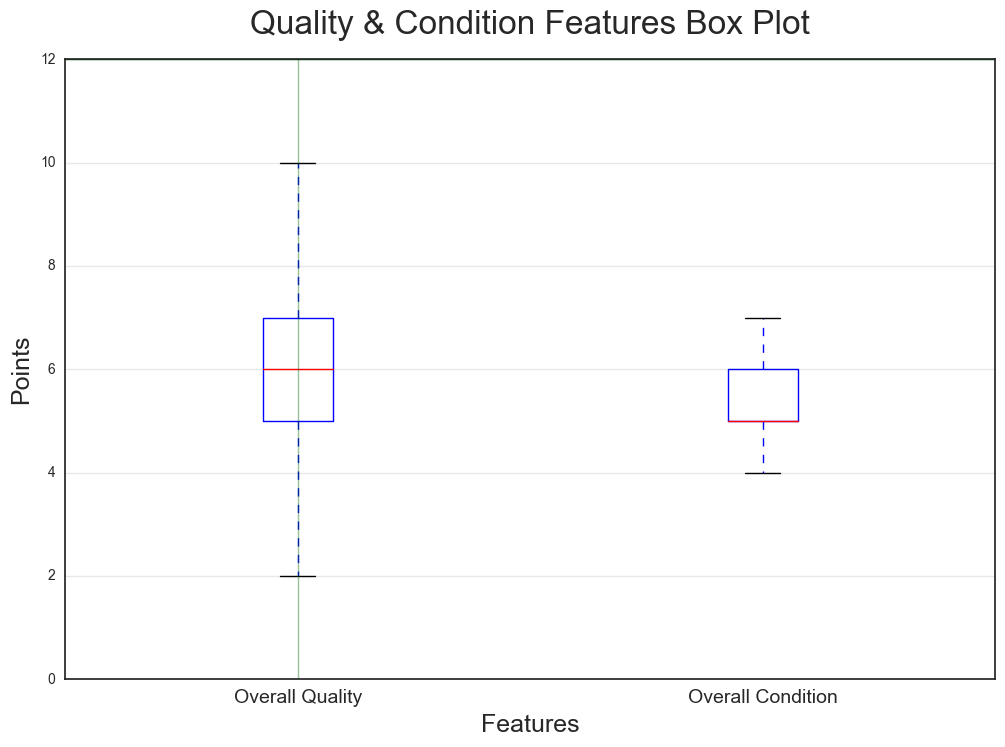

In [197]:
data = [ames['OverallQual'], ames['OverallCond']]

fig, ax1 = plt.subplots(figsize=(12, 8))

plt.boxplot(data)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('Quality & Condition Features Box Plot', y =1.03, fontsize = 24)
ax1.set_xlabel('Features', fontsize = 18)
ax1.set_ylabel('Points', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 2
ax1.set_xlim(0.5, numBoxes + 0.5) 
ax1.set_ylim(0, 12)
xtickNames = plt.setp(ax1, xticklabels=['Overall Quality', 'Overall Condition'])
plt.setp(xtickNames, fontsize=14)

plt.axhline(12, color = 'darkgreen')
plt.axvline(1, color = 'darkgreen', linewidth = 1, alpha = 0.4)

plt.show()


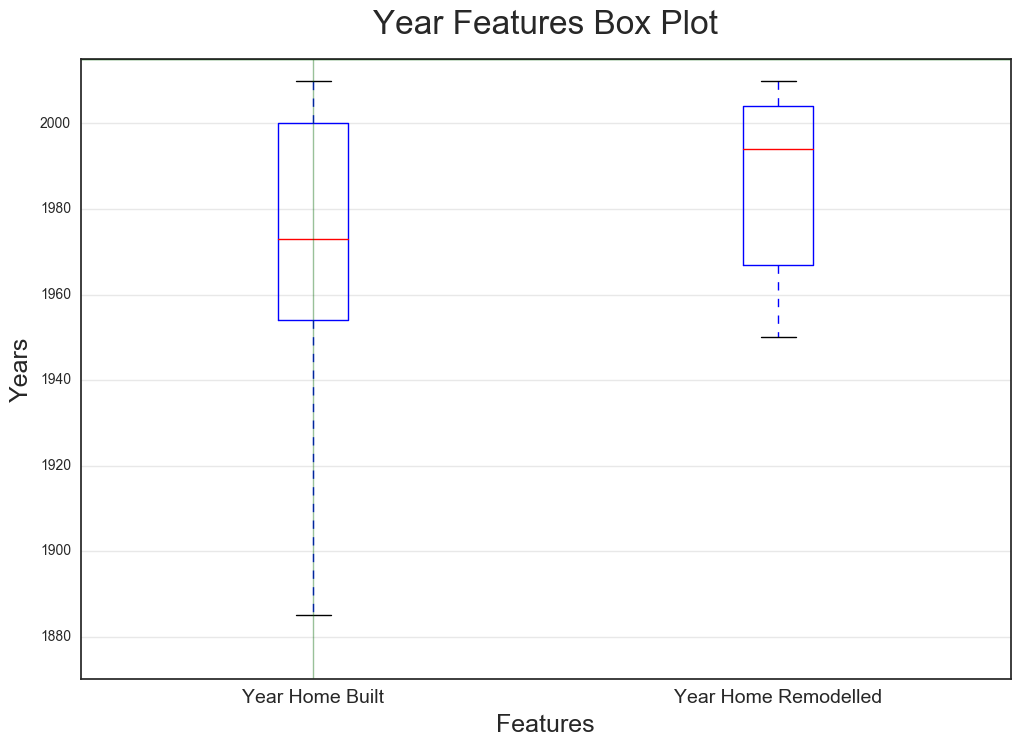

In [198]:
data = [ames['YearBuilt'], ames['YearRemodAdd']]

fig, ax1 = plt.subplots(figsize=(12, 8))

plt.boxplot(data)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('Year Features Box Plot', y =1.03, fontsize = 24)
ax1.set_xlabel('Features', fontsize = 18)
ax1.set_ylabel('Years', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 2
ax1.set_xlim(0.5, numBoxes + 0.5) 
ax1.set_ylim(1870, 2015)
xtickNames = plt.setp(ax1, xticklabels=['Year Home Built', 'Year Home Remodelled'])
plt.setp(xtickNames, fontsize=14)

plt.axhline(2015, color = 'darkgreen')
plt.axvline(1, color = 'darkgreen', linewidth = 1, alpha = 0.4)

plt.show()


In [199]:
#Summary of Year Home Built
ames['YearBuilt'].describe()


count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [200]:
ames[ames['YearBuilt'] < 1950]


,Neighborhood,LotArea,Utilities,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MoSold,YrSold,SalePrice
3,Crawfor,9550,AllPub,1Fam,2Story,7,5,1915,1970,Gable,CompShg,1717,1,0,3,1,2,2006,140000
8,OldTown,6120,AllPub,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,1774,2,0,2,2,4,2008,129900
9,BrkSide,7420,AllPub,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,1077,1,0,2,2,1,2008,118000
15,BrkSide,6120,AllPub,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,854,1,0,2,1,7,2007,132000
21,IDOTRR,7449,AllPub,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,1108,1,0,3,1,6,2007,139400
29,BrkSide,6324,AllPub,1Fam,1Story,4,6,1927,1950,Gable,CompShg,520,1,0,1,1,5,2008,68500
30,IDOTRR,8500,AllPub,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,1317,1,0,3,1,7,2008,40000
48,OldTown,4456,AllPub,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,1452,2,0,2,3,6,2009,113000
51,BrkSide,6240,AllPub,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,1176,1,0,3,1,9,2006,114500
61,IDOTRR,7200,AllPub,1Fam,2.5Unf,5,7,1920,1996,Gable,CompShg,1111,1,0,3,1,3,2007,101000


In [201]:
#Neighborhood, House Style vs Sales Price
pd.pivot_table(ames, index=['Neighborhood'], columns=['HouseStyle'], values=['SalePrice'],\
               aggfunc=[np.mean,len],\
               margins=True).sort_values(('len', 'SalePrice','All'),ascending=False)


mean                                                    \
             SalePrice                                                     
HouseStyle      1.5Fin    1.5Unf    1Story    2.5Fin    2.5Unf    2Story   
Neighborhood                                                               
All           143116.0  110150.0  175985.0  220000.0  157354.0  210051.0   
NAmes         131053.0  120250.0  141184.0       NaN       NaN  172745.0   
CollgCr            NaN       NaN  186709.0       NaN       NaN  223773.0   
OldTown       123281.0   95100.0  107876.0  291333.0  156425.0  133176.0   
Edwards       116486.0       NaN  122114.0       NaN       NaN  149160.0   
Somerst            NaN       NaN  245330.0       NaN       NaN  210315.0   
Gilbert       164000.0       NaN  201782.0       NaN       NaN  193923.0   
NridgHt            NaN       NaN  304793.0       NaN       NaN  338783.0   
Sawyer        140700.0       NaN  132932.0       NaN       NaN  153880.0   
NWAmes        229000.0       NaN  179705.0       NaN       NaN  202605.0   
SawyerW       316600.0   76000.0  161472.0       NaN       NaN  214945.0   
BrkSide       140924.0  118750.0   89985.0       NaN  214500.0  165095.0   
Crawfor       220372.0   96500.0  218143.0  191000.0  164000.0  208114.0   
Mitchel       167171.0       NaN  152095.0       NaN       NaN  175333.0   
NoRidge       347500.0       NaN  345066.0       NaN       NaN  332779.0   
Timber        208225.0       NaN  253671.0       NaN       NaN  254112.0   
IDOTRR        114011.0  113200.0   85077.0       NaN  101000.0   89400.0   
ClearCr       206405.0       NaN  223681.0       NaN       NaN  223487.0   
SWISU         140073.0       NaN   75500.0  173750.0       NaN  148271.0   
StoneBr            NaN       NaN  283094.0       NaN       NaN  380968.0   
Blmngtn            NaN       NaN  194870.0       NaN       NaN       NaN   
MeadowV            NaN       NaN  131950.0       NaN       NaN  102737.0   
BrDale             NaN       NaN       NaN       NaN       NaN  104493.0   
Veenker            NaN       NaN  243937.0       NaN       NaN  294000.0   
NPkVill            NaN       NaN  134812.0       NaN       NaN  149000.0   
Blueste            NaN       NaN       NaN       NaN       NaN  137500.0   

                                                     len                       \
                                               SalePrice                        
HouseStyle      SFoyer      SLvl           All    1.5Fin 1.5Unf 1Story 2.5Fin   
Neighborhood                                                                    
All           135074.0  166703.0  180921.19589     154.0   14.0  726.0    8.0   
NAmes         140393.0  167535.0  145847.00000      15.0    2.0  159.0    NaN   
CollgCr       138300.0  143133.0  197965.00000       NaN    NaN   91.0    NaN   
OldTown       142000.0       NaN  128225.00000      33.0    2.0   33.0    3.0   
Edwards       144400.0  162828.0  128219.00000      22.0    NaN   53.0    NaN   
Somerst            NaN       NaN  225379.00000       NaN    NaN   37.0    NaN   
Gilbert            NaN  173785.0  192854.00000       1.0    NaN   11.0    NaN   
NridgHt            NaN       NaN  316270.00000       NaN    NaN   51.0    NaN   
Sawyer        138143.0  155100.0  136793.00000       5.0    NaN   53.0    NaN   
NWAmes        170000.0  176628.0  189050.00000       1.0    NaN   35.0    NaN   
SawyerW       148112.0  275000.0  186555.00000       1.0    1.0   28.0    NaN   
BrkSide            NaN       NaN  124834.00000      25.0    6.0   20.0    NaN   
Crawfor            NaN       NaN  210624.00000       9.0    1.0   19.0    1.0   
Mitchel       158460.0  160640.0  156270.00000       4.0    NaN   32.0    NaN   
NoRidge            NaN       NaN  335295.00000       2.0    NaN    6.0    NaN   
Timber             NaN  166875.0  242247.00000       2.0    NaN   23.0    NaN   
IDOTRR             NaN       NaN  100123.00000      16.0    2.0   13.0    NaN   
ClearCr            NaN  155000.0  21

In [202]:
#RoofStyle vs Sales Price
pd.pivot_table(ames, index=['RoofStyle'], values=['SalePrice'],\
               aggfunc=[np.mean,len],\
               margins=True).sort_values(('len', 'SalePrice'),ascending=False)


,mean,len
,SalePrice,SalePrice
RoofStyle,,
All,180921.19589,1460.0
Gable,171483.00000,1141.0
Hip,218876.00000,286.0
Flat,194690.00000,13.0
Gambrel,148909.00000,11.0
Mansard,180568.00000,7.0
Shed,225000.00000,2.0


In [203]:
#Investigate Target Variable Data
ames['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [265]:
ames[ames['SalePrice'] > 400000]


,Neighborhood,LotArea,Utilities,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
58,StoneBr,0.317111,AllPub,1Fam,2Story,2.820459,-0.517023,1.149962,1.023678,Hip,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
161,NridgHt,0.317712,AllPub,1Fam,2Story,2.097391,-0.517023,1.050634,0.926804,Gable,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,StoneBr,0.691913,AllPub,1Fam,1Story,2.097391,-0.517023,1.216181,1.168989,Hip,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
185,OldTown,1.245651,AllPub,1Fam,2.5Fin,2.820459,3.077516,-2.624509,0.393998,Gable,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,NoRidge,0.462985,AllPub,1Fam,2Story,1.374324,-0.517023,0.785759,0.539309,Gable,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,NridgHt,0.394055,AllPub,1Fam,1Story,2.097391,-0.517023,1.149962,1.072115,Gable,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,NridgHt,0.993278,AllPub,1Fam,2Story,2.097391,-0.517023,1.116853,1.023678,Hip,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389,NridgHt,0.196085,AllPub,1Fam,2Story,2.820459,-0.517023,1.183071,1.120552,Gable,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,NridgHt,0.492340,AllPub,1Fam,1Story,2.820459,-0.517023,1.216181,1.120552,Hip,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
473,NridgHt,0.446854,AllPub,1Fam,1Story,1.374324,-0.517023,1.149962,1.072115,Gable,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


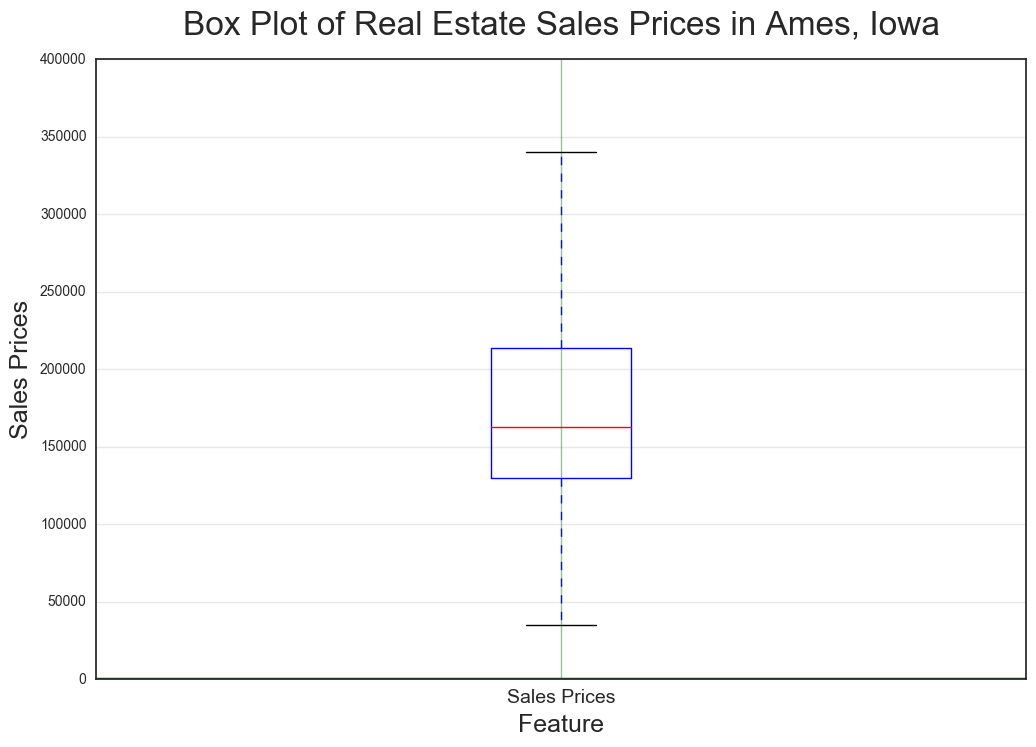

In [205]:
data = [ames['SalePrice']]

fig, ax1 = plt.subplots(figsize=(12, 8))

plt.boxplot(data)

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('Box Plot of Real Estate Sales Prices in Ames, Iowa', y =1.03, fontsize = 24)
ax1.set_xlabel('Feature', fontsize = 18)
ax1.set_ylabel('Sales Prices', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 1
ax1.set_xlim(0.5, numBoxes + 0.5) 
ax1.set_ylim(0, 400000)
xtickNames = plt.setp(ax1, xticklabels=['Sales Prices'])
plt.setp(xtickNames, fontsize=14)

plt.axhline(0, color = 'darkgreen')
plt.axvline(1, color = 'darkgreen', linewidth = 1, alpha = 0.4)

plt.show()


In [206]:
#Option 1, in re: Neighborhood
#Dummy Variable Creation
categories = ["HouseStyle","RoofStyle","Neighborhood"]

for e in categories:
    series = ames[e]
    dummies = pd.get_dummies(series, prefix=e, drop_first = True)
    ames = pd.concat([ames, dummies], axis=1)


In [207]:
print ames.columns


Index([u'Neighborhood', u'LotArea', u'Utilities', u'BldgType', u'HouseStyle',
       u'OverallQual', u'OverallCond', u'YearBuilt', u'YearRemodAdd',
       u'RoofStyle', u'RoofMatl', u'GrLivArea', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'MoSold', u'YrSold', u'SalePrice',
       u'HouseStyle_1.5Unf', u'HouseStyle_1Story', u'HouseStyle_2.5Fin',
       u'HouseStyle_2.5Unf', u'HouseStyle_2Story', u'HouseStyle_SFoyer',
       u'HouseStyle_SLvl', u'RoofStyle_Gable', u'RoofStyle_Gambrel',
       u'RoofStyle_Hip', u'RoofStyle_Mansard', u'RoofStyle_Shed',
       u'Neighborhood_Blueste', u'Neighborhood_BrDale',
       u'Neighborhood_BrkSide', u'Neighborhood_ClearCr',
       u'Neighborhood_CollgCr', u'Neighborhood_Crawfor',
       u'Neighborhood_Edwards', u'Neighborhood_Gilbert',
       u'Neighborhood_IDOTRR', u'Neighborhood_MeadowV',
       u'Neighborhood_Mitchel', u'Neighborhood_NAmes', u'Neighborhood_NPkVill',
       u'Neighborhood_NWAmes', u'Neighborhood_NoRidge',
 

In [208]:
len(ames.columns)


55

In [114]:
#Option 2, in re: Neighborhood
#Account for difference in neighborhood, in re: SalePrice

upscale = []
midscale = []
scale = []
lowscale = []

for x in ames['Neighborhood']:
    if x in ["NoRidge","NridgHT","StoneBR","Timber","Veenker","Somerst"]:
        upscale.append(1)
        midscale.append(0)
        scale.append(0)
        lowscale.append(0)
    elif x in ["CleanCr","Crawfor","CollgCR","Blmngtn","Gilbert","NWAmes"]:
        upscale.append(0)
        midscale.append(1)
        scale.append(0)
        lowscale.append(0)
    elif x in ["SawyerW","Mitchel","NAmes","NPkWill","SWISU","Blueste"]:
        upscale.append(0)
        midscale.append(0)
        scale.append(1)
        lowscale.append(0)
    elif x in ["Sawyer","OldTown","Edwards","BrkSide","BrDale","IDOTRR","MeadowV"]:
        upscale.append(0)
        midscale.append(0)
        scale.append(0)
        lowscale.append(1)
    else:
        upscale.append(0)
        midscale.append(0)
        scale.append(0)
        lowscale.append(0)
ames["upscale"] = upscale
ames["midscale"] = midscale
ames["scale"] = scale
ames["lowscale"] = lowscale


In [115]:
sum(ames["lowscale"])


415

In [209]:
ames[ames['SalePrice'].isnull()]


,Neighborhood,LotArea,Utilities,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker


In [210]:
y = ames['SalePrice']
y.mean()


180921.19589041095

In [211]:
ames['RoofMatl'].value_counts()


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

In [212]:
#Normalize Data
ames.LotArea = (ames.LotArea - ames.LotArea.mean())\
                   / ames.LotArea.std()
    
ames.OverallCond = (ames.OverallCond - ames.OverallCond.mean())\
                   / ames.OverallCond.std()

ames.YearBuilt = (ames.YearBuilt - ames.YearBuilt.mean())\
                   / ames.YearBuilt.std()
    
ames.OverallQual = (ames.OverallQual - ames.OverallQual.mean())\
                   / ames.OverallQual.std()
    
ames.YearRemodAdd = (ames.YearRemodAdd - ames.YearRemodAdd.mean())\
                   / ames.YearRemodAdd.std()
    
ames.GrLivArea = (ames.GrLivArea - ames.GrLivArea.mean())\
                   / ames.GrLivArea.std()

ames.FullBath = (ames.FullBath - ames.FullBath.mean())\
                   / ames.FullBath.std()
    
ames.HalfBath = (ames.HalfBath - ames.HalfBath.mean())\
                   / ames.HalfBath.std()
    
ames.BedroomAbvGr = (ames.BedroomAbvGr - ames.BedroomAbvGr.mean())\
                   / ames.BedroomAbvGr.std()

ames.KitchenAbvGr = (ames.KitchenAbvGr - ames.KitchenAbvGr.mean())\
                   / ames.KitchenAbvGr.std()


In [213]:
len(ames.columns)


55

In [214]:
ames.columns


Index([u'Neighborhood', u'LotArea', u'Utilities', u'BldgType', u'HouseStyle',
       u'OverallQual', u'OverallCond', u'YearBuilt', u'YearRemodAdd',
       u'RoofStyle', u'RoofMatl', u'GrLivArea', u'FullBath', u'HalfBath',
       u'BedroomAbvGr', u'KitchenAbvGr', u'MoSold', u'YrSold', u'SalePrice',
       u'HouseStyle_1.5Unf', u'HouseStyle_1Story', u'HouseStyle_2.5Fin',
       u'HouseStyle_2.5Unf', u'HouseStyle_2Story', u'HouseStyle_SFoyer',
       u'HouseStyle_SLvl', u'RoofStyle_Gable', u'RoofStyle_Gambrel',
       u'RoofStyle_Hip', u'RoofStyle_Mansard', u'RoofStyle_Shed',
       u'Neighborhood_Blueste', u'Neighborhood_BrDale',
       u'Neighborhood_BrkSide', u'Neighborhood_ClearCr',
       u'Neighborhood_CollgCr', u'Neighborhood_Crawfor',
       u'Neighborhood_Edwards', u'Neighborhood_Gilbert',
       u'Neighborhood_IDOTRR', u'Neighborhood_MeadowV',
       u'Neighborhood_Mitchel', u'Neighborhood_NAmes', u'Neighborhood_NPkVill',
       u'Neighborhood_NWAmes', u'Neighborhood_NoRidge',
 

In [215]:
#Select features for linear regression model building
colvars = [x for x in ames.columns if x not in ['SalePrice','Neighborhood','Utilities','BldgType','HouseStyle','RoofStyle','RoofMatl']]

x = ames[colvars]


In [216]:
x.shape


(1460, 48)

In [217]:
y.shape


(1460,)

In [218]:
#Implement a train test
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33)

print 'Length of X_train: ' + str(len(X_train))
print 'Length of y_train: ' + str(len(y_train))
print
print 'Length of X_test: ' + str(len(X_test))
print 'Length of y_test: ' + str(len(y_test))


Length of X_train: 978
Length of y_train: 978

Length of X_test: 482
Length of y_test: 482


In [219]:
# Statsmodel version of Linear Regression Analysis
# need to add an intercept in sm
X = sm.add_constant(x)

# fit the model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     139.7
Date:                Tue, 11 Apr 2017   Prob (F-statistic):               0.00
Time:                        21:38:08   Log-Likelihood:                -17267.
No. Observations:                1460   AIC:                         3.463e+04
Df Residuals:                    1411   BIC:                         3.489e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                 7.353e+05 

In [220]:
results.mse_resid


1134504459.8748171

In [221]:
results.resid


0        1195.881891
1      -26688.289157
2       12370.929452
3      -38804.226888
4      -52630.190271
5       -6840.786228
6       54439.364005
7       -8279.527916
8      -18069.173228
9       13948.952072
10       2357.039280
11       6015.137876
12      19140.100961
13      66441.018420
14      -9236.036994
15     -15542.356478
16      -1179.296256
17     -18242.231753
18       4948.671600
19     -11357.459944
20      -2259.408687
21      -3531.304639
22     -24743.981209
23       5887.081934
24      14012.713263
25     -36737.058582
26      19017.511863
27       6359.927445
28      35880.812103
29      -4699.740959
            ...     
1430     6980.275010
1431     6856.456923
1432   -25402.326797
1433    -4547.106430
1434    19693.519871
1435   -28634.691262
1436    21176.305865
1437    67159.621007
1438    -9078.757866
1439   -16650.222093
1440   -37021.927693
1441    -1577.584552
1442    22701.123365
1443       81.769370
1444   -24604.737081
1445      522.409240
1446     5700

In [222]:
results.params


const                   735253.539904
LotArea                   6236.126799
OverallQual              20263.231122
OverallCond               7004.683209
YearBuilt                11102.956361
YearRemodAdd              1548.158784
GrLivArea                39126.733002
FullBath                  1860.794480
HalfBath                  3634.606607
BedroomAbvGr             -3221.777905
KitchenAbvGr             -4617.245835
MoSold                    -396.158646
YrSold                    -288.621807
HouseStyle_1.5Unf        15068.875837
HouseStyle_1Story        22119.051126
HouseStyle_2.5Fin       -23007.619680
HouseStyle_2.5Unf       -12604.980319
HouseStyle_2Story        -6256.225473
HouseStyle_SFoyer        28184.815567
HouseStyle_SLvl          14588.278409
RoofStyle_Gable          -2611.702099
RoofStyle_Gambrel         3557.787519
RoofStyle_Hip             5108.181042
RoofStyle_Mansard        -6071.354425
RoofStyle_Shed           -2787.889984
Neighborhood_Blueste     -2827.338711
Neighborhood

In [223]:
#Reset independent vars without self-imposed y-intercept
X = x

In [224]:
#Now using Sklearn - import our estimator
lr = linear_model.LinearRegression()
lr_model = lr.fit(X, y)
lr_model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [225]:
#Calculate R^2 to measure the model's variance
from sklearn.metrics import r2_score

y_true = y
y_pred = lr_model.predict(X) #predict function to get y_hat

lr_r2 =  r2_score(y_true=y_true, y_pred=y_pred)
lr_r2


0.82615104178224874

In [226]:
lr_model.predict(X)

array([ 207304.11810904,  208188.28915695,  211129.07054826, ...,
        259396.21549175,  135711.92388364,  138960.66340258])

In [227]:
lr_model.intercept_


735253.53990418825

In [228]:
Mean_Yhat = y.mean()
Mean_Yhat_SE = np.square(y - Mean_Yhat)
print "MSE:", Mean_Yhat_SE.mean()


MSE: 6306788585.35


In [229]:
abs(lr_model.coef_).mean()


15390.955805176789

In [230]:
abs(lr_model.coef_).max()


74103.705367616116

In [231]:
zip(X, lr_model.coef_)


[('LotArea', 6236.1267985942723),
 ('OverallQual', 20263.231122123965),
 ('OverallCond', 7004.6832087591492),
 ('YearBuilt', 11102.956360652333),
 ('YearRemodAdd', 1548.158784288622),
 ('GrLivArea', 39126.733001551467),
 ('FullBath', 1860.7944804411841),
 ('HalfBath', 3634.6066071243508),
 ('BedroomAbvGr', -3221.7779048100529),
 ('KitchenAbvGr', -4617.2458354290175),
 ('MoSold', -396.15864558379326),
 ('YrSold', -288.62180684515261),
 ('HouseStyle_1.5Unf', 15068.875836784759),
 ('HouseStyle_1Story', 22119.051126442577),
 ('HouseStyle_2.5Fin', -23007.619679853869),
 ('HouseStyle_2.5Unf', -12604.980319097725),
 ('HouseStyle_2Story', -6256.2254725627536),
 ('HouseStyle_SFoyer', 28184.815567179325),
 ('HouseStyle_SLvl', 14588.278408505739),
 ('RoofStyle_Gable', -2611.7020991115351),
 ('RoofStyle_Gambrel', 3557.7875190411655),
 ('RoofStyle_Hip', 5108.1810421273758),
 ('RoofStyle_Mansard', -6071.354425101089),
 ('RoofStyle_Shed', -2787.8899836819646),
 ('Neighborhood_Blueste', -2827.33871059

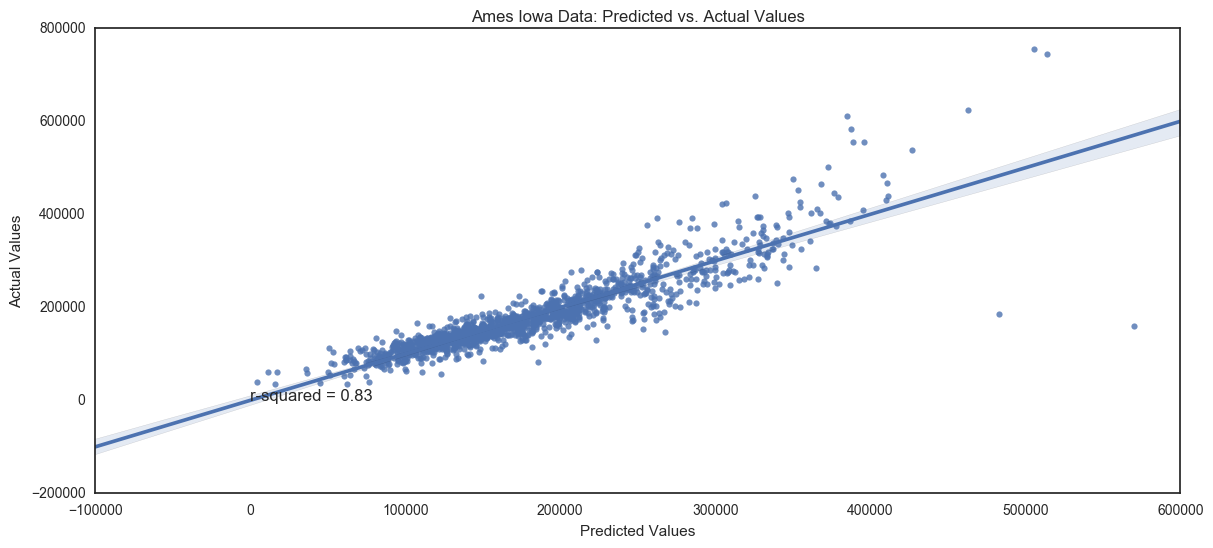

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

ax = sns.regplot(y_pred, y_true)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(14)
plt.annotate('r-squared = ' + str(round(lr_r2,2)), xy=(41,-5), fontsize=12)
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')
ax.set_title('Ames Iowa Data: Predicted vs. Actual Values');


In [233]:
#L1 Regression Analysis
lasso = linear_model.Lasso(alpha=1)
lasso_model = lasso.fit(X, y)


In [234]:
#Get R^2
y_true_lasso = y
y_pred_lasso = lasso_model.predict(X)

lasso_r2 =  r2_score(y_true=y_true_lasso, y_pred=y_pred_lasso)
y_pred_lasso


array([ 207284.40411402,  208093.10499   ,  211132.65370311, ...,
        259402.2769549 ,  135700.76882247,  138948.34810365])

In [235]:
lasso_r2


0.82614713626896852

In [236]:
zip(X, lasso_model.coef_)


[('LotArea', 6252.0092819648553),
 ('OverallQual', 20255.725233597397),
 ('OverallCond', 7009.9388182119901),
 ('YearBuilt', 11054.198190907648),
 ('YearRemodAdd', 1538.298231188586),
 ('GrLivArea', 39113.487152053203),
 ('FullBath', 1845.4599804579125),
 ('HalfBath', 3620.9003041547007),
 ('BedroomAbvGr', -3200.1779498479632),
 ('KitchenAbvGr', -4620.2584830422993),
 ('MoSold', -393.72277037706885),
 ('YrSold', -284.79754913242891),
 ('HouseStyle_1.5Unf', 14950.243611812386),
 ('HouseStyle_1Story', 22070.786829841101),
 ('HouseStyle_2.5Fin', -22785.685776481161),
 ('HouseStyle_2.5Unf', -12455.928220633805),
 ('HouseStyle_2Story', -6243.6618209332864),
 ('HouseStyle_SFoyer', 28130.487962871044),
 ('HouseStyle_SLvl', 14552.781675012726),
 ('RoofStyle_Gable', -2548.6438161759902),
 ('RoofStyle_Gambrel', 3458.070904859153),
 ('RoofStyle_Hip', 5170.8318599991653),
 ('RoofStyle_Mansard', -5810.203161835193),
 ('RoofStyle_Shed', -1863.3272559201398),
 ('Neighborhood_Blueste', -3503.043375055

In [237]:
print 'For linear regression:'
print 'mean abs val of coefficients: ' + str(abs(lr_model.coef_).mean())
print 'max abs val of coefficients: ' + str(abs(lr_model.coef_).max())
print 
print 'For LASSO:'
print 'mean abs val of coefficients: ' + str(abs(lasso_model.coef_).mean())
print 'max abs val of coefficients: ' + str(abs(lasso_model.coef_).max())


For linear regression:
mean abs val of coefficients: 15390.9558052
max abs val of coefficients: 74103.7053676

For LASSO:
mean abs val of coefficients: 14841.9025402
max abs val of coefficients: 72783.3583794


In [238]:
answers = {}

for a in (0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 1):
    ex_model = linear_model.Lasso(alpha=a, normalize=True)
    ex_model.fit(X,y)
    answers[a] = abs(ex_model.coef_).mean()
import pprint
pprint.pprint(answers)


{0.0001: 15390.382163039851,
 0.001: 15385.220873433413,
 0.01: 15344.639636464583,
 0.1: 14942.219406252874,
 0.25: 14459.380947805563,
 0.5: 13717.196197916097,
 1: 13198.544219406069}


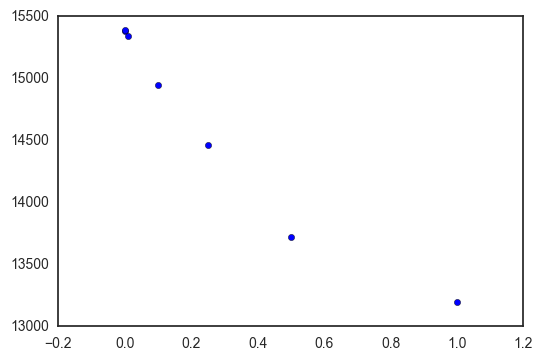

In [239]:
plt.scatter(answers.keys(), answers.values())
plt.show()


In [257]:
from sklearn.model_selection import cross_val_predict
cvp_lcv_preds = cross_val_predict(lasso_model, X, y, cv=5)
cvp_lcv_preds


array([ 207535.19912422,  210985.05293154,  210025.07504845, ...,
        257290.71972406,  136172.46995608,  141150.59389766])

In [240]:
#Re-Fit on training and test data
lasso_tts = linear_model.Lasso(alpha=.01)
tts_model = lasso_tts.fit(X_train, y_train)

tts_lasso_r2 =  r2_score(y_true=y_test, y_pred=tts_model.predict(X_test))

print 'original lasso r2:', lasso_r2
print 'tts lasso r2:     ', tts_lasso_r2


original lasso r2: 0.826147136269
tts lasso r2:      0.810238948347


In [241]:
lr_tts = linear_model.LinearRegression(normalize=True)
lr_tts_model = lr_tts.fit(X_train, y_train)

print 'original linreg r2 for test set: ', r2_score(y_true=y_test, y_pred=lr_model.predict(X_test))
print 'tts linreg r2 for test set: ', r2_score(y_true=y_test, y_pred=lr_tts_model.predict(X_test))


original linreg r2 for test set:  0.831273963501
tts linreg r2 for test set:  0.81023834094


In [242]:
# testing eight different alpha levels
rcv = linear_model.RidgeCV(alphas=
                           (.001, .001, .01, .1, .5, 1, 5, 10),
                           store_cv_values=True,
                          )
rcv


RidgeCV(alphas=(0.001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

In [243]:
rcv_model = rcv.fit(X, y)


In [244]:
rcv_r2 =  rcv_model.score(X, y)
rcv_r2


0.82432290210733439

In [255]:
from sklearn.model_selection import cross_val_predict
cvp_rcv_preds = cross_val_predict(rcv_model, X, y, cv=5)
cvp_rcv_preds


array([ 208585.40428169,  200735.66530658,  211509.63636742, ...,
        257046.64965824,  136109.0281846 ,  141026.91053662])

In [245]:
pd.DataFrame(rcv_model.cv_values_, columns=rcv.alphas).head(3)


,0.001,0.001,0.01,0.1,0.5,1.0,5.0,10.0
0,1.462179e+06,1.462179e+06,1.463276e+06,1.467261e+06,1.398613e+06,1.240155e+06,1.982769e+05,7.280270e+04
1,8.837332e+08,8.837332e+08,8.814560e+08,8.600004e+08,7.826398e+08,7.074559e+08,3.879474e+08,2.288521e+08
2,1.561543e+08,1.561543e+08,1.560569e+08,1.551455e+08,1.518449e+08,1.483947e+08,1.270512e+08,1.078988e+08


In [246]:
from sklearn.model_selection import cross_val_predict

cvp_lr_preds = cross_val_predict(lr, X, y, cv=5)
cvp_lr_preds


array([ 207545.81034395,  211120.72937196,  210019.27227256, ...,
        257298.63215172,  136190.55203216,  141192.62349649])

In [247]:
cvp_lr_r2 =  r2_score(y_true=y, y_pred=cvp_lr_preds)
cvp_lr_r2

0.80590021825983482

In [248]:
rcv_model.alpha_


5.0

In [249]:
abs(rcv_model.coef_).mean()


11057.83117994042

In [250]:
from sklearn.metrics import mean_squared_error
print 'Mean squared error for Ridge: ', mean_squared_error(y_true=y_test, y_pred=rcv_model.predict(X_test))
print 'Mean squared error for linreg: ', mean_squared_error(y_true=y_test, y_pred=lr_tts_model.predict(X_test))


Mean squared error for Ridge:  1104801589.5
Mean squared error for linreg:  1215364389.22


In [251]:
print 'r2 for Ridge: ', r2_score(y_true=y_test, y_pred=rcv_model.predict(X_test))
print 'r2 for linreg: ', r2_score(y_true=y_test, y_pred=lr_tts_model.predict(X_test))


r2 for Ridge:  0.827501131007
r2 for linreg:  0.81023834094


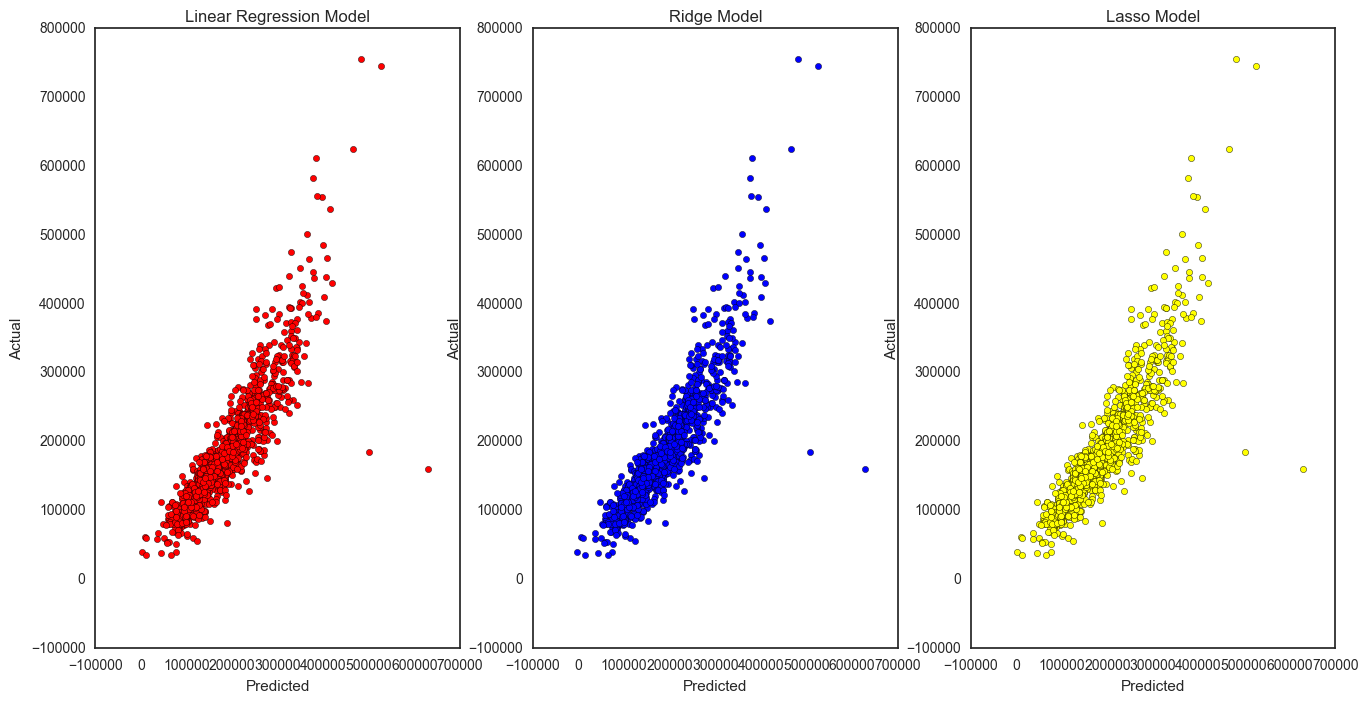

In [259]:
fig, axes = plt.subplots(1,3, figsize=(16,8))

axes[0].scatter(cvp_lr_preds, y, c='red')
axes[1].scatter(cvp_rcv_preds, y, c='blue')
axes[2].scatter(cvp_lcv_preds, y, c='yellow')

axes[0].set_title('Linear Regression Model')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

axes[1].set_title('Ridge Model')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

axes[2].set_title('Lasso Model')
axes[2].set_ylabel('Actual')
axes[2].set_xlabel('Predicted');
